In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#farpcc
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('social_network_ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [10]:
model=LogisticRegression()

In [11]:
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_predicted=model.predict(x_test)

In [13]:
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [14]:
model.score(x_train,y_train)

0.84375

In [15]:
model.score(x_test,y_test)

0.8125

In [16]:
confusion_matrix(y_test,y_predicted)

array([[43,  5],
       [10, 22]], dtype=int64)

In [17]:
accuracy_score(y_test,y_predicted)

0.8125

In [18]:
recall_score(y_test,y_predicted)

0.6875

In [19]:
f1_score(y_test,y_predicted)

0.7457627118644068

In [20]:
precision_score(y_test,y_predicted)

0.8148148148148148

In [21]:
error_rate=1-accuracy_score(y_test,y_predicted)
error_rate

0.1875

In [22]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.81      0.69      0.75        32

    accuracy                           0.81        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.81      0.81      0.81        80



Text(50.722222222222214, 0.5, 'predicted_label')

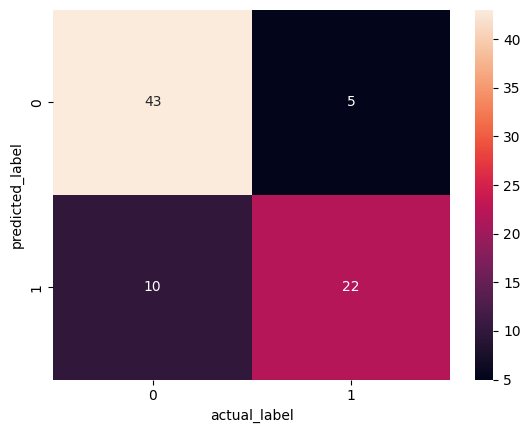

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cbar=True)
plt.xlabel('actual_label')
plt.ylabel('predicted_label')